# Experiments on model_l6_fc_1
In this step of experiments, we start on model_l6_fc_1, which has 3 Conv layers and 3 FC layers, and its variations. For training we will use lr = 0.01 and momentum = 0.9

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [4]:
batch_size = 100#batch_size will be used to get accuracy
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = '/input/data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','test','validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train','test','validation']}

In [19]:
class ConvNet_L6(nn.Module):#this model is same as model_l6_fc_1, we rename it as ConvNet_L6 to keep consistency with annotation on paper
    def __init__(self):
        super(ConvNet_L6, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)#compared to model_l6 in the previous step, model_l6_fc_1 only changes FC layers
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [20]:
class ConvNet_L7(nn.Module):
    def __init__(self):
        super(ConvNet_L7, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [39]:
class ConvNet_L7Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L7Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
        self.conv2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*512,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [47]:
class ConvNet_L9(nn.Module):
    def __init__(self):
        super(ConvNet_L9, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [48]:
class ConvNet_L9Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L9Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [24]:
class ConvNet_L11(nn.Module):
    def __init__(self):
        super(ConvNet_L11, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [25]:
class ConvNet_L11Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L11Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv1_1_bn = nn.BatchNorm2d(32)
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv1_2_bn = nn.BatchNorm2d(32)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_1_bn = nn.BatchNorm2d(64)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv2_2_bn = nn.BatchNorm2d(64)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_1_bn = nn.BatchNorm2d(128)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv3_2_bn = nn.BatchNorm2d(128)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_1_bn = nn.BatchNorm2d(256)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_2_bn = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1_bn(self.conv1_1(x)))
        x = F.max_pool2d(F.relu(self.conv1_2_bn(self.conv1_2(x))), 2, 2)
        x = F.relu(self.conv2_1_bn(self.conv2_1(x)))
        x = F.max_pool2d(F.relu(self.conv2_2_bn(self.conv2_2(x))), 2, 2)
        x = F.relu(self.conv3_1_bn(self.conv3_1(x)))
        x = F.max_pool2d(F.relu(self.conv3_2_bn(self.conv3_2(x))), 2, 2)
        x = F.relu(self.conv4_1_bn(self.conv4_1(x)))
        x = F.max_pool2d(F.relu(self.conv4_2_bn(self.conv4_2(x))), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [60]:
class ConvNet_L13(nn.Module):
    def __init__(self):
        super(ConvNet_L13, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_3 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_4 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.max_pool2d(F.relu(self.conv4_4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

define a helper function that helps us calculate accuracy

In [ ]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    print('accuracy on testset: {}%'.format(100*float(count)/float(batch_size*len(dataset))),count)

set training process with lr = 0.01, momentum = 0.9, epoch = 10 for every model training.

In [27]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 10):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.all_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))
        AccuracyHelper(self.model, data['test'])

### Load in models. when you have tuned your model classes, don't forget to reload models here!!! (Don't ask me why I mention this...)

In [61]:
model_l6  = ConvNet_L6()
model_l6.cuda()
model_l7  = ConvNet_L7()
model_l7.cuda()
model_l7p = ConvNet_L7Plus()
model_l7p.cuda()
model_l9  = ConvNet_L9()
model_l9.cuda()
model_l9p = ConvNet_L9Plus()
model_l9p.cuda()
model_l11 = ConvNet_L11()
model_l11.cuda()
model_l11p= ConvNet_L11Plus()
model_l11p.cuda()
model_l13 = ConvNet_L13()
model_l13.cuda()

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l7, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l7p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l9, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l9p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l11, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l11p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l13, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

finished testing all models. We are ready to go!

## visualize results

plot losses

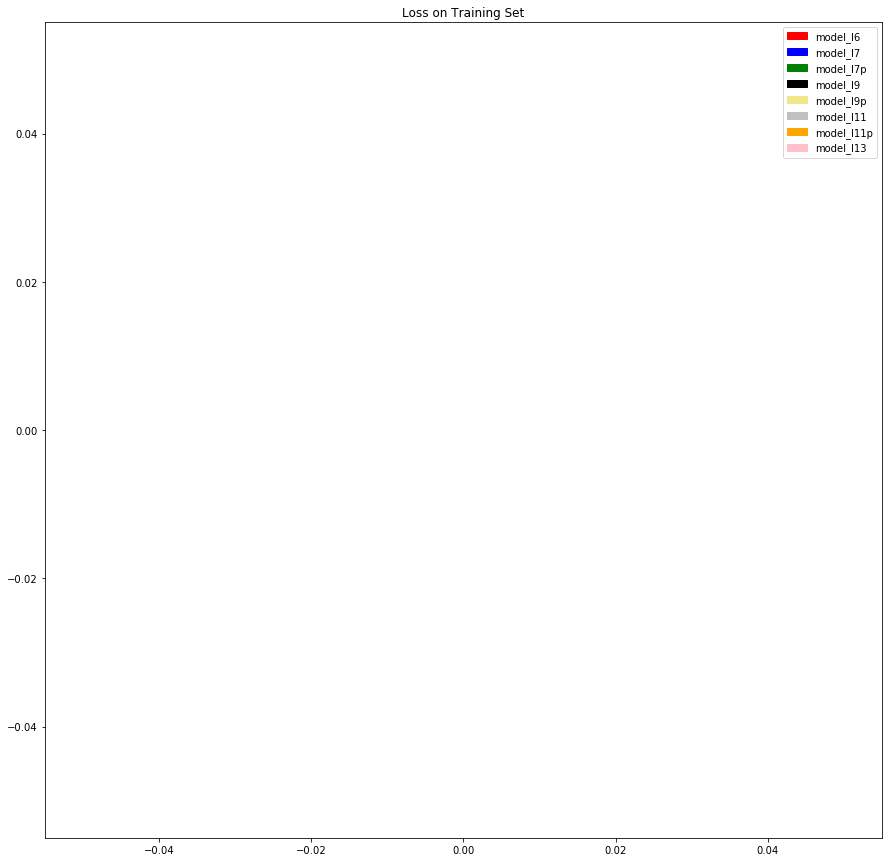

In [31]:
red_patch = mpatches.Patch(color='red', label='model_l6')
blue_patch = mpatches.Patch(color='blue', label='model_l7')
green_patch = mpatches.Patch(color='green', label='model_l7p')
black_patch = mpatches.Patch(color='black', label='model_l9')
khaki_patch = mpatches.Patch(color='khaki', label='model_l9p')
silver_patch = mpatches.Patch(color='silver', label='model_l11')
orange_patch = mpatches.Patch(color='orange', label='model_l11p')
pink_patch = mpatches.Patch(color='pink', label='model_l13')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper right')
plt.title('Loss on Training Set')
plt.plot(model_l6.all_losses, 'red')
plt.plot(model_l7.all_losses, 'blue')
plt.plot(model_l7p.all_losses, 'green')
plt.plot(model_l9.all_losses, 'black')
plt.plot(model_l9p.all_losses, 'khaki')
plt.plot(model_l11.all_losses, 'silver')
plt.plot(model_l11p.all_losses, 'orange')
plt.plot(model_l13.all_losses, 'pink')

plt.show()

plot accuracy

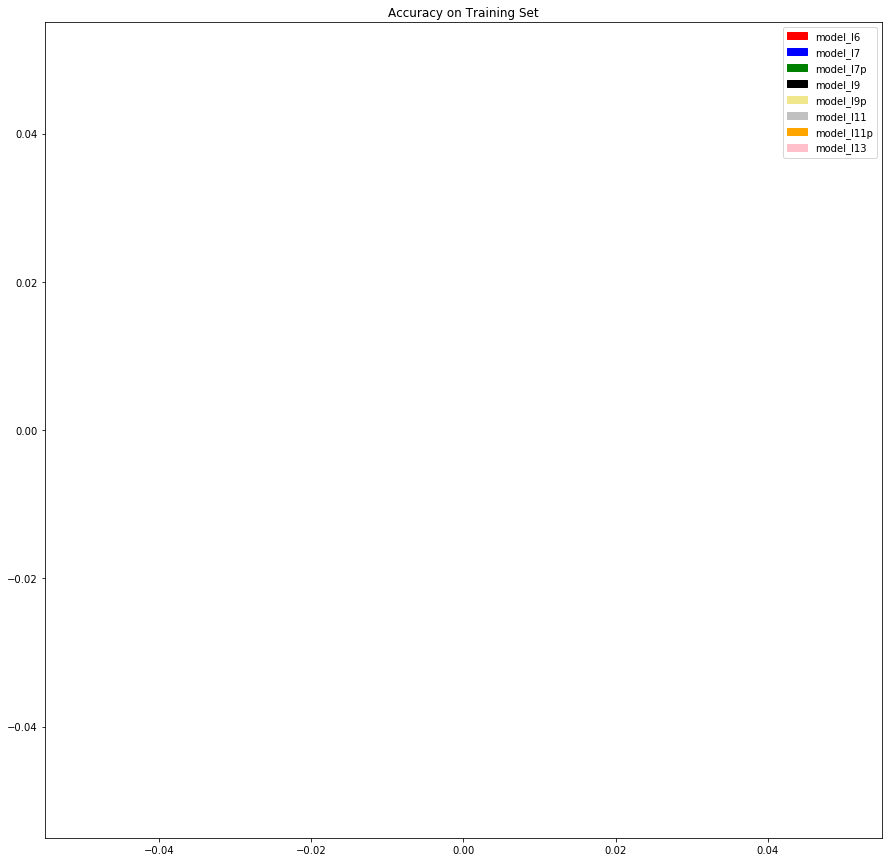

In [32]:
red_patch = mpatches.Patch(color='red', label='model_l6')
blue_patch = mpatches.Patch(color='blue', label='model_l7')
green_patch = mpatches.Patch(color='green', label='model_l7p')
black_patch = mpatches.Patch(color='black', label='model_l9')
khaki_patch = mpatches.Patch(color='khaki', label='model_l9p')
silver_patch = mpatches.Patch(color='silver', label='model_l11')
orange_patch = mpatches.Patch(color='orange', label='model_l11p')
pink_patch = mpatches.Patch(color='pink', label='model_l13')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper right')
plt.title('Accuracy on Training Set')
plt.plot(model_l6.all_accuracy, 'red')
plt.plot(model_l7.all_accuracy, 'blue')
plt.plot(model_l7p.all_accuracy, 'green')
plt.plot(model_l9.all_accuracy, 'black')
plt.plot(model_l9p.all_accuracy, 'khaki')
plt.plot(model_l11.all_accuracy, 'silver')
plt.plot(model_l11p.all_accuracy, 'orange')
plt.plot(model_l13.all_accuracy, 'pink')

plt.show()